# Simple RNN (many-to-one 문제)
- 사인파형 시계열을 입력으로 받아 다음 스텝의 출력을 예측
- 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만든다

- 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = np.sin(np.arange(21) * np.pi/4)
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

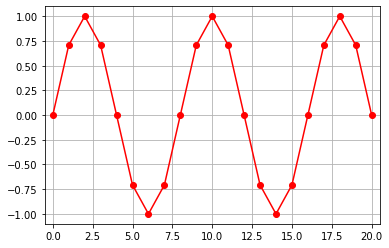

In [3]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5), plt.grid()
plt.show()

- X_train, y_train 데이터 생성

In [4]:
X_train = []
y_train = np.empty(len(s) - 3)
for i in range(len(s) - 3):
  X_train.append(s[i:i+3])
  y_train[i] = s[i+3]
y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [5]:
np.array(X_train).shape

(18, 3)

In [8]:
# 입력 데이터 갯수, timesteps, input dim
X_train = np.array(X_train).reshape(-1, 3, 1)
X_train.shape

(18, 3, 1)

In [10]:
X_train[0], y_train[0]

(array([[0.        ],
        [0.70710678],
        [1.        ]]), 0.7071067811865476)

In [11]:
X_train[1], y_train[1]

(array([[0.70710678],
        [1.        ],
        [0.70710678]]), 1.2246467991473532e-16)

- 순환 신경망 모델 정의/설

In [12]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [14]:
model = Sequential([
    SimpleRNN(10, input_shape=X_train.shape[1:], activation='tanh'),
    Dense(1, activation='linear'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile('adam', loss='mse')

- 모델 학습전

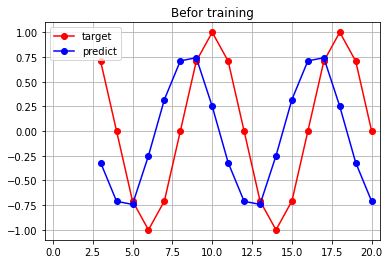

In [18]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label='target')
plt.plot(np.arange(3, 21), model.predict(X_train), 'bo-', label='predict')
plt.xlim(-0.5, 20.5), plt.grid()
plt.legend(), plt.title('Befor training')
plt.show()

- 모델 학습

In [19]:
hist = model.fit(X_train, y_train, epochs=100, verbose=0)

- 모델 학습후

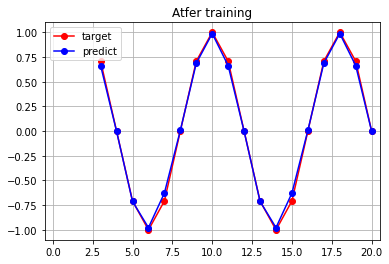

In [20]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label='target')
plt.plot(np.arange(3, 21), model.predict(X_train), 'bo-', label='predict')
plt.xlim(-0.5, 20.5), plt.grid()
plt.legend(), plt.title('Atfer training')
plt.show()